In [55]:
## Importing the MNIST Dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, X_test.shape)  # Loads the dataset and splits it into training (60,000 images) and testing (10,000 images)

(60000, 28, 28) (10000, 28, 28)


In [56]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
## Displays the Shapes of the Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")

Training set shape: (60000, 28, 28), Test set shape: (10000, 28, 28)


In [58]:
## Data Preporocessing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0 # Converts the Integers to Floats

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1) # Reshapes the Input data for CNN

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10) # One-hot Encodes the Labels


In [59]:
## Split the data into training (54,000 images) and validation (6,000 images)
X_train, X_val, y_train_cat, y_val_cat = train_test_split(X_train, y_train_cat, test_size=0.1, random_state=36)

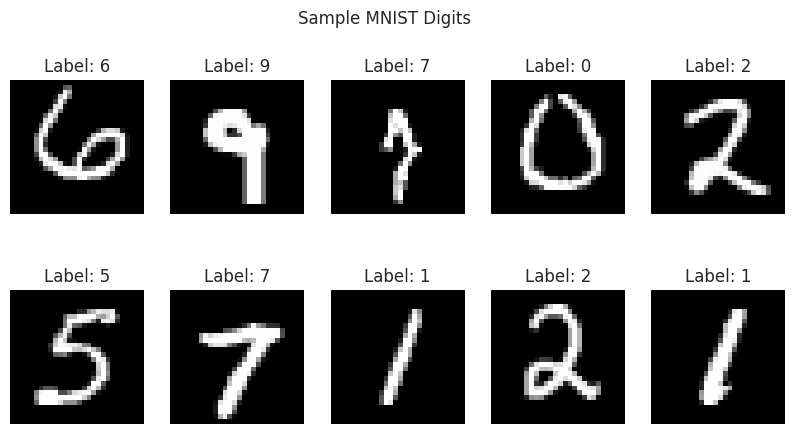

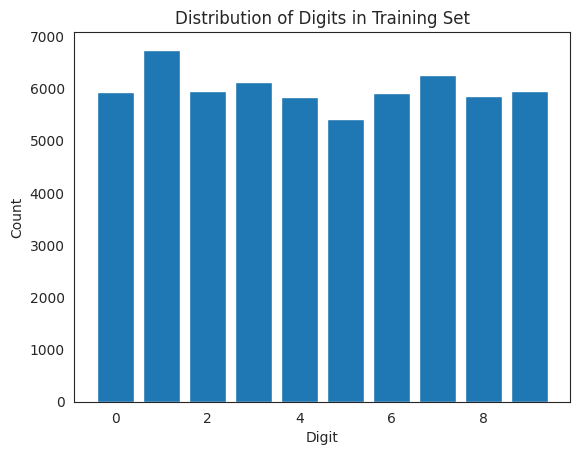

In [60]:
## EDA
#Display the first ten images from dataset in greyscale 28x28
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train_cat[i])}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.show()

# Plot bar chart displaying dataset balance
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.title("Distribution of Digits in Training Set")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

In [ ]:
## Building the first model
model_1 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train_cat, epochs=5, batch_size=128, validation_data=(X_val, y_val_cat))

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8683 - loss: 0.4593 - val_accuracy: 0.9727 - val_loss: 0.0952
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9790 - loss: 0.0729 - val_accuracy: 0.9820 - val_loss: 0.0640
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.9868 - loss: 0.0450 - val_accuracy: 0.9822 - val_loss: 0.0556
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9906 - loss: 0.0323 - val_accuracy: 0.9835 - val_loss: 0.0540
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9940 - loss: 0.0220 - val_accuracy: 0.9860 - val_loss: 0.0480


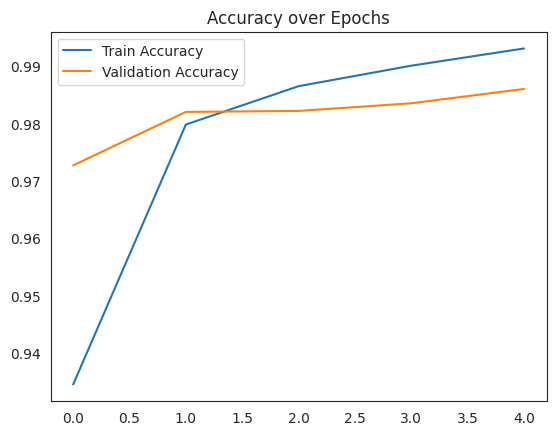

In [ ]:
## Plotting the training curve of the first model
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()

In [ ]:
## Building the second model
model_2 = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model_2.fit(X_train, y_train_cat, epochs=10, batch_size=128, validation_data=(X_val, y_val_cat))

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7895 - loss: 0.6566 - val_accuracy: 0.9708 - val_loss: 0.0920
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9659 - loss: 0.1131 - val_accuracy: 0.9805 - val_loss: 0.0614
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9765 - loss: 0.0798 - val_accuracy: 0.9850 - val_loss: 0.0457
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9801 - loss: 0.0648 - val_accuracy: 0.9880 - val_loss: 0.0393
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.9834 - loss: 0.0567 - val_accuracy: 0.9887 - val_loss: 0.0375
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9856 - loss: 0.0473 - val_accuracy: 0.9893 - val_loss: 0.0345
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9865 - loss: 0.0447 - val_accuracy: 0.9893 - val_loss: 0.0323
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - accuracy: 0.9886 - loss: 0.0382 - 

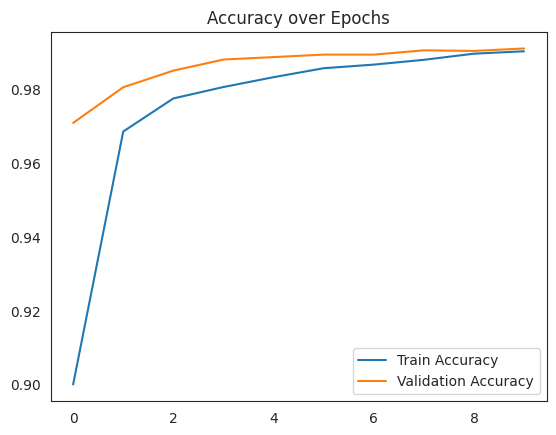

In [ ]:
## Plotting the training curve of the second model
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy over Epochs")
plt.legend()
plt.show()